find size of embedding (last layer of model) for each saved model

preprocess lvl embedding size


In [7]:
import torch
import timm
import sys
sys.path.append('..')
from models.fusion_model import FusionModel
from models.resnet_plus_model import ResNetPlusModel
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from data.wildlife_dataset import WildlifeDataModule
from wildlife_datasets import analysis, datasets, loader
from data.raptors_wildlife import Raptors


import yaml

# Load config from file
with open("/Users/amee/Documents/code/master-thesis/EagleID/configs/config-hpc-raptors.yml", "r") as f:
    config = yaml.safe_load(f)
# create a config dict
# config = {}
# config['wildlife_name'] = 'raptors'
# config['animal_cat'] = 'bird'
config['dataset'] = '/Users/amee/Documents/code/master-thesis/datasets/raptor_individuals_cropped'
config['cache_path']= '/Users/amee/Documents/code/master-thesis/EagleID/dataset/dataframe/cache_raptors_split.csv' #  CACHE
config['preprocess_lvl'] = 3 # PREPROCESSING
config['batch_size'] = 4
config['num_workers'] = 1
# config['img_size'] =224
# config['transforms'] = {}
# config['transforms']['mean'] = [0.485, 0.456, 0.406]
# config['transforms']['std'] = [0.229, 0.224, 0.225]
# config['split_ratio'] = 0.8
config['splitter'] = 'metadata_split' # CUSTOM CLOSED / metadata
# config['only_cache'] = False # FALSE
# config['arcface_loss'] = {}
# config['arcface_loss']['n_classes'] = 0
config['custom_transform'] = True
# config['use_gradcam'] = False
config['val_viz'] = True

dataset = Raptors(root=config['dataset'])
dataset.df['wildlife_name'] = 'raptors'
data = WildlifeDataModule(metadata=dataset.df, config = config)

Dataset size before pre-processing and cleaning: 509
Removed 0 rows with invalid segmentation data.
Split: closed-set
Samples: train/test/unassigned/total = 382/127/0/509
Classes: train/test/unassigned/total = 69/53/0/69
Classes: train only/test only/joint  = 16/0/53

Fraction of train set     = 75.05%
Fraction of test set only = 0.00%
Training Set
Length: 382
Number of individuals (classes): 69
Mean images/individual: 5.536231884057971
Min images/individual: 2
Max images/individual: 48
Test Set
Length: 127
Number of individuals (classes): 53
Mean images per individual: 2.3962264150943398
Min images per individual: 1
Max images per individual: 8


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['query'] = df_test['query'].astype(bool)


Loaded mask cache from ../dataset/data_cache/train_raptors_mask.npz: Masks count: 369
Loaded primary cache from ../dataset/data_cache/train_raptors_skeleton.npz: Skeleton: 369
Precomputed data loaded from bbox_mask_skeleton for train_raptors. Only to be used for processing lvl 2-5
Loaded mask cache from ../dataset/data_cache/query_raptors_mask.npz: Masks count: 49
Loaded primary cache from ../dataset/data_cache/query_raptors_skeleton.npz: Skeleton: 49
Precomputed data loaded from bbox_mask_skeleton for query_raptors. Only to be used for processing lvl 2-5
Loaded mask cache from ../dataset/data_cache/gallery_raptors_mask.npz: Masks count: 78
Loaded primary cache from ../dataset/data_cache/gallery_raptors_skeleton.npz: Skeleton: 78
Precomputed data loaded from bbox_mask_skeleton for gallery_raptors. Only to be used for processing lvl 2-5


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name        | Type               | Params | Mode 
-----------------------------------------------------------
0 | backbone    | FeatureListNet     | 23.5 M | train
1 | global_pool | AdaptiveAvgPool2d  | 0      | train
2 | embedding   | Sequential         | 262 K  | train
3 | loss_fn     | TripletMarginLoss  | 0      | train
4 | miner       | TripletMarginMiner | 0      | train
-----------------------------------------------------------
23.8 M    Trainable params
0         Non-trainable params
23.8 M    Total params
95.095    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


using GPU to compute original distance
starting re_ranking


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a).to(device=b.device if isinstance(b, torch.Tensor) else 'cpu')
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b).to(device=a.device)
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T
/Users/amee/miniconda3

Training: |          | 0/? [00:00<?, ?it/s]

/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a).to(device=b.device if isinstance(b, torch.Tensor) else 'cpu')
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b).to(device=a.device)


Distance matrix type should be np for rerankin: <class 'numpy.ndarray'>
Random mAP: 0.03927055253370193


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Idx 331: Shape mismatch! img_array (706, 343) vs mask (710, 366)
Idx 327: Shape mismatch! img_array (399, 1110) vs mask (344, 564)
Idx 34: Shape mismatch! img_array (414, 149) vs mask (418, 147)
Idx 119: Shape mismatch! img_array (464, 298) vs mask (433, 406)
Idx 72: Shape mismatch! img_array (95, 100) vs mask (163, 187)
Idx 97: Shape mismatch! img_array (390, 716) vs mask (209, 353)
Idx 21: Shape mismatch! img_array (137, 348) vs mask (246, 307)
Idx 117: Shape mismatch! img_array (372, 691) vs mask (469, 337)
Idx 135: Shape mismatch! img_array (332, 148) vs mask (267, 761)
Idx 94: Shape mismatch! img_array (493, 215) vs mask (484, 189)
Idx 5: Shape mismatch! img_array (105, 238) vs mask (101, 254)
Idx 6: Shape mismatch! img_array (107, 93) vs mask (121, 68)
Idx 63: Shape mismatch! img_array (231, 179) vs mask (275, 110)


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

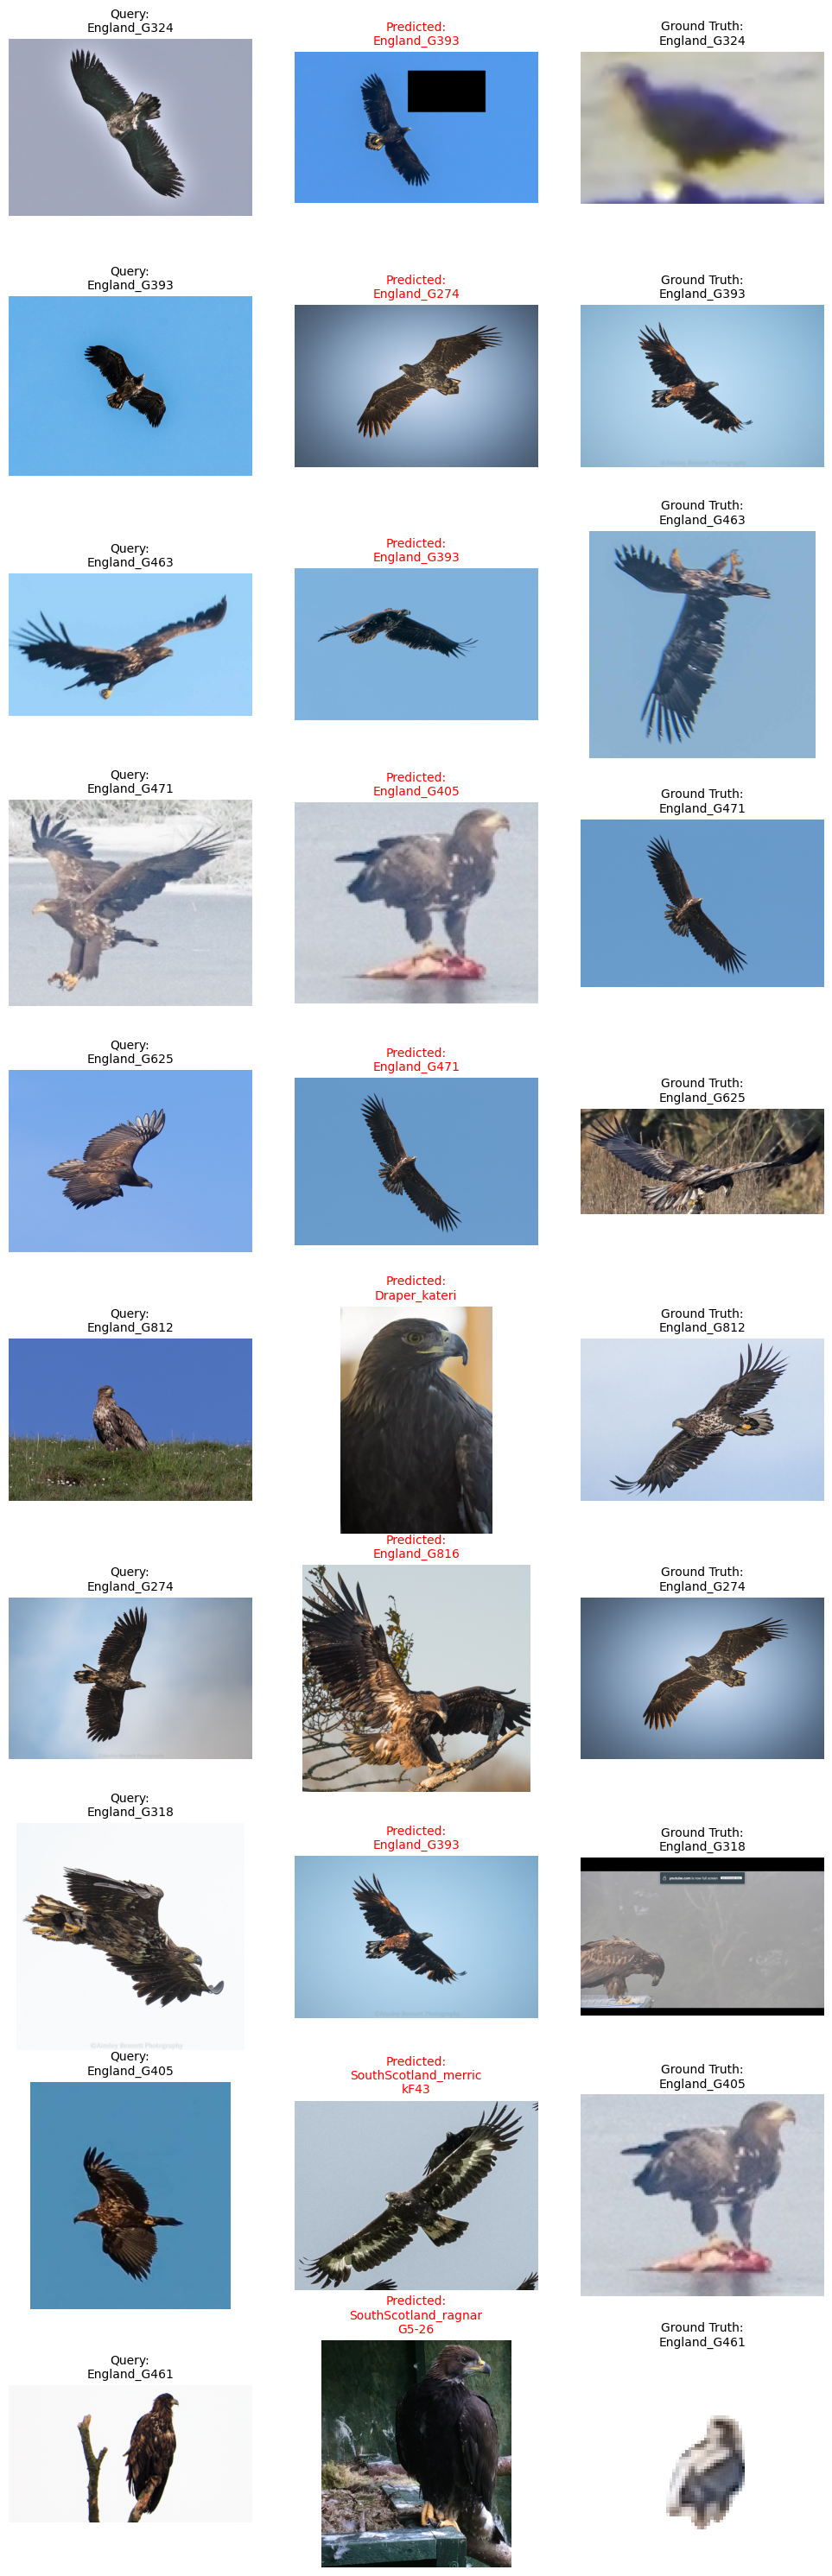

AttributeError: 'NoneType' object has no attribute 'save'

In [8]:
from train import get_basic_callbacks
from utils.viz_callback import SimilarityVizCallback
config['backbone_name'] = 'resnet50'
config['embedding_size'] = 128
config['triplet_loss'] = {}
config['triplet_loss']['margin'] = 0.2
config['triplet_loss']['mining_type'] = "semihard"
config['triplet_loss']['distance_matrix'] = 'cosine'
config['re_ranking'] = True
config['solver'] = {}
config['solver']['BASE_LR'] = 0.001
config['solver']['OPT'] = 'adam'
config['solver']['WEIGHT_DECAY'] = 0.0001
config['solver']['LR_SCHEDULER'] = 'step'
config['solver']['LR_STEP_SIZE'] = 10
config['solver']['LR_DECAY_RATE'] = 0.1
config['outdir'] = "train_trial_results"
config['use_wandb'] = False

model = ResNetPlusModel(config = config)

viz_callback = SimilarityVizCallback(
            config=config, 
            outdir=config['outdir'], 
            log_every_n_epochs=1 
        )
callbacks = [viz_callback] if config['val_viz'] else []

trainer_args = {
        'max_epochs': 1,
        'callbacks': callbacks,
        'default_root_dir': config['outdir'],
        'accelerator': 'cpu',
        'deterministic': True,
        'profiler': 'simple',
        'num_sanity_val_steps': -1, # -1 to check all validation data, 0 to turn off
        'precision': "32-true",
    }

trainer = Trainer(**trainer_args)
trainer.fit(model, data)

In [ ]:

dataset = Raptors(root=config['dataset'])
dataset.df['wildlife_name'] = 'raptors'
data = WildlifeDataModule(metadata=dataset.df, config = config)

# Path to the saved checkpoint
ckpt_path = "/Users/amee/Documents/code/master-thesis/EagleID/checkpoints/model-7vv8ip2a.ckpt"

model = ResNetPlusModel.load_from_checkpoint(
    checkpoint_path=ckpt_path,
    config=config,
    pretrained=False
)
print('in_channels: ',model.backbone.conv1.in_channels)
checkpoint = torch.load(ckpt_path)

model.eval()  # ensure eval mode

trainer = Trainer(accelerator="cpu")
trainer.validate(model, dataloaders=data.val_dataloader())

In [18]:
# Get the list of DataLoaders (query and gallery)
val_loaders = data.val_dataloader()

# Access the Query DataLoader
query_loader = val_loaders[0]

# Extract a batch from the Query DataLoader
query_batch = next(iter(query_loader))

# Check how many elements are in the batch
print("Number of elements in batch:", len(query_batch))

# Adjust unpacking based on the batch structure (images, labels)
x, y = query_batch

# Forward pass to get output shape
model.eval()
with torch.no_grad():
    output = model(x)

print("Output shape:", output.shape)  # Should print (batch_size, embedding_size)

Number of elements in batch: 2
Output shape: torch.Size([4, 128])


Print predictions for model

In [19]:
from utils.triplet_loss_utils import KnnClassifier
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.features import DeepFeatures

from sklearn.metrics import precision_score, recall_score, f1_score
from utils.visualization import query_prediction_results_similarity
import numpy as np


In [20]:
# Evaluate the model in retrieval metrics -- ONLY ONE SPECIES IN DATASET ALREADY (NO FILTERING REQUIRED)
# dataset_database_P = WildlifeDataset(metadata.df.iloc[100:,:], metadata.root, transform=transform)
# dataset_query_P = WildlifeDataset(metadata.df.iloc[:100,:], metadata.root, transform=transform)
dataset_query_P = data.val_query_dataset
dataset_database_P = data.val_gallery_dataset

# name = 'hf-hub:BVRA/MegaDescriptor-T-224'
extractor_P = DeepFeatures(model , device = 'cpu')

query_P, database_P = extractor_P(dataset_query_P), extractor_P(dataset_database_P)

similarity_function = CosineSimilarity()
similarity_P = similarity_function(query_P, database_P)
print(similarity_P)
classifier_P = KnnClassifier(k=1, database_labels=dataset_database_P.labels_string)
predictions_P = classifier_P(similarity_P['cosine'])
print("Predictions for 100 test Images:-\n",predictions_P)
accuracy_P = np.mean(dataset_query_P.labels_string == predictions_P)
print("Accuracy: {:.2f}%".format(accuracy_P * 100))

precision_P = precision_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
recall_P = recall_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
f1_P = f1_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
print("Precision:", precision_P)
print("Recall:", recall_P)
print("F1 Score:", f1_P)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.42s/it]

{'cosine': array([[ 0.8746631 ,  0.46505708,  0.42394385, ...,  0.8757773 ,
         0.33676684, -0.7084092 ],
       [ 0.5592804 ,  0.91528946,  0.93828565, ...,  0.5564125 ,
         0.9661575 ,  0.6225354 ],
       [ 0.2532197 ,  0.7360814 ,  0.7708305 , ...,  0.25020257,
         0.82549864,  0.84521306],
       ...,
       [ 0.9462284 ,  0.61194706,  0.5747042 , ...,  0.9469324 ,
         0.4954405 , -0.57585114],
       [ 0.9183883 ,  0.5491179 ,  0.5099808 , ...,  0.9195568 ,
         0.42665493, -0.637506  ],
       [ 0.8318452 ,  1.0000002 ,  0.9936341 , ...,  0.8300024 ,
         0.98727214,  0.28510058]], dtype=float32)}
19
93
Predictions for 100 test Images:-
 ['SouthScotland_heatherF05' 'England_022' 'BigBear_shadow' 'Orrhult_269K'
 'England_G318' 'England_G461' 'SouthScotland_shineB44' 'Alabama_natchez'
 'England_G818' 'England_G463' 'England_G818' 'England_G818'
 'SouthScotland_emily121' 'BigBear_jackie' 'SouthScotland_mapleF24'
 'England_022' 'SouthScotland_skanC17' 'So


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


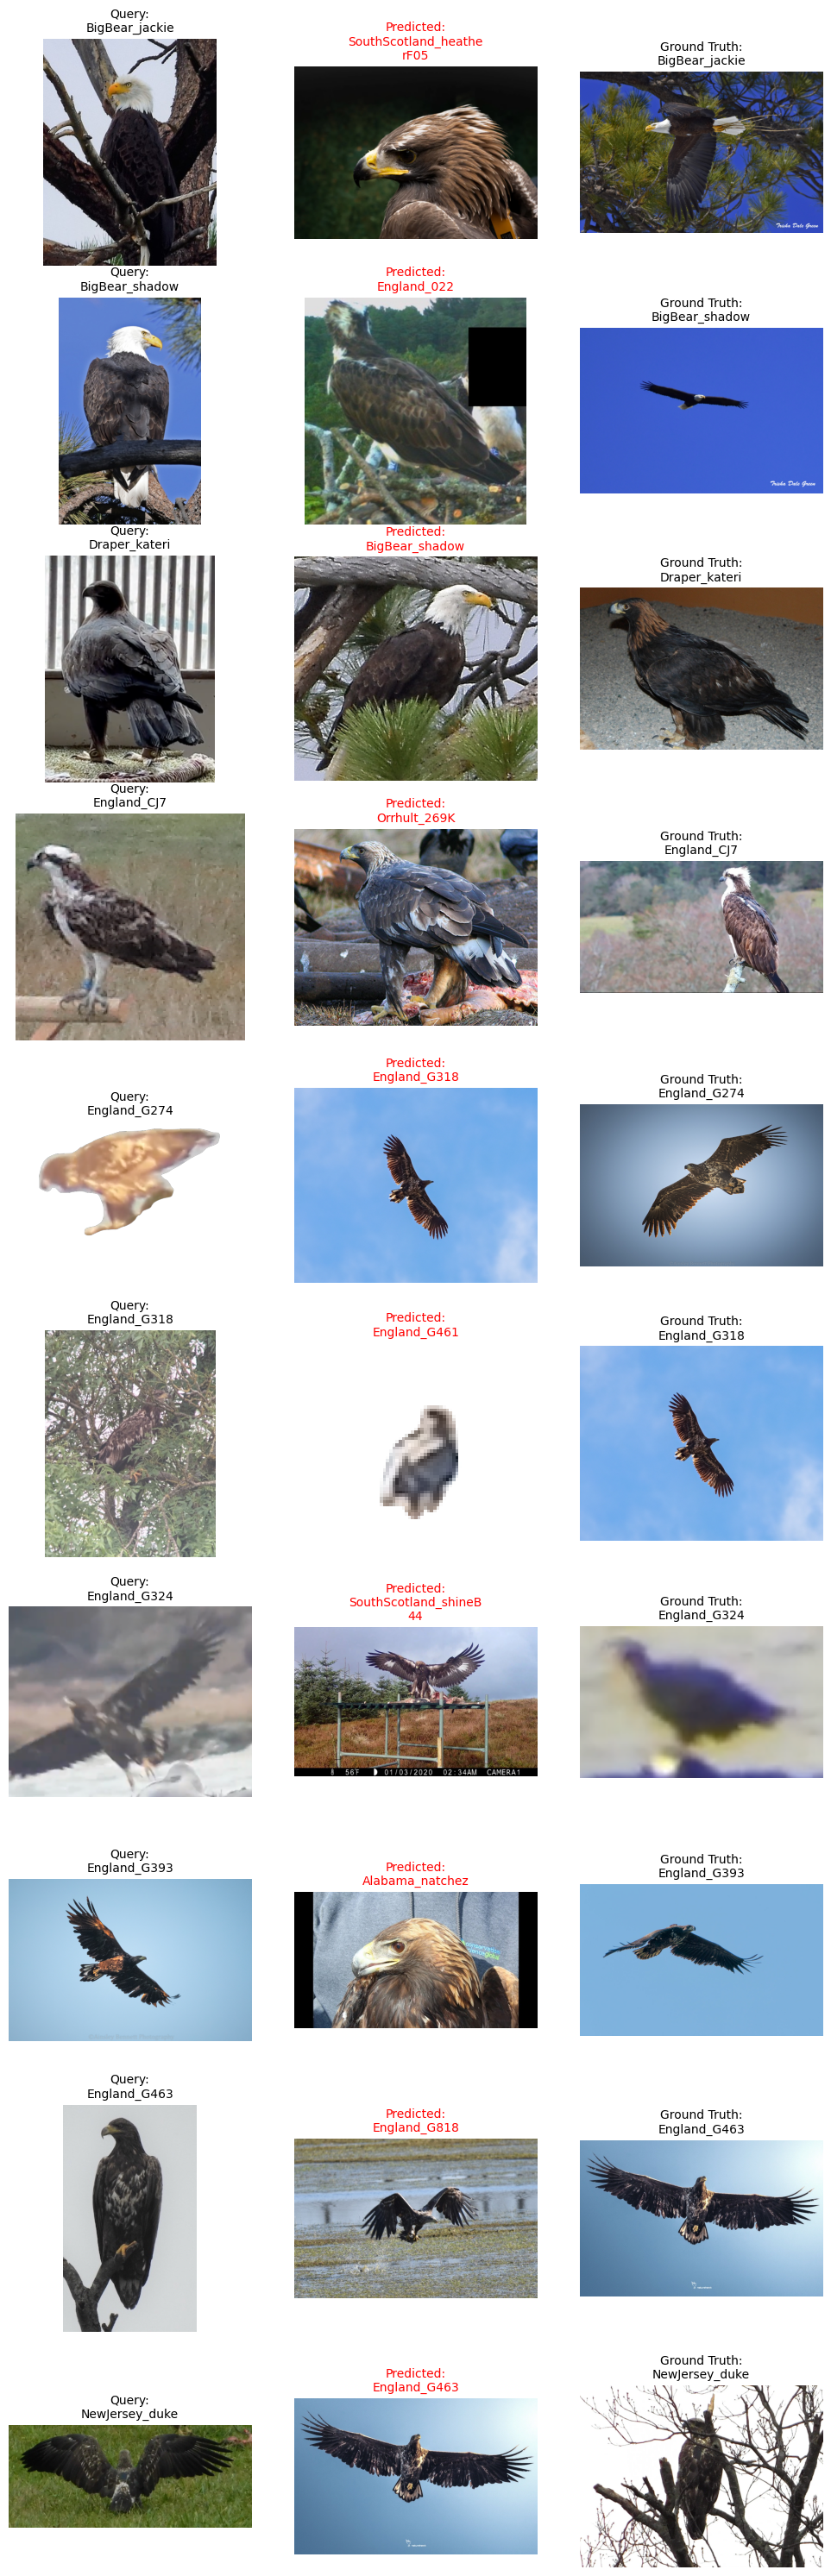

In [21]:
# prediction for dataset with just one species
query_prediction_results_similarity(
    root=config['dataset'],
    query_metadata=dataset_query_P.metadata,
    db_metadata=dataset_database_P.metadata,
    query_start=0,
    similarity_scores=similarity_P['cosine'],
    num_images=10
)